# Leaky Aquifer Test
**This example is taken from Kruseman and de Ridder (1970)**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ttim import *

Set basic parameters for the model:

In [2]:
H = 37 #aquifer thickness [m]
zt = - 8 #top boundary of aquifer
zb = zt - H
Q = 761 #constant pumping rate [m^3/d]
t = 0.34 #time start pumping [d]

Create concptual model:

In [3]:
#unkonwn parameters: kaq, Saq, c
ml = ModelMaq(kaq=10, z=[0, zt, zb], c=500, Saq=0.001, topboundary='semi', \
              tmin=0.001, tmax=0.5)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, Q), (0.34, 0)])
ml.solve(silent = 'True')

Load data of four observation wells:

In [4]:
#data of observation well 30 m away from pumping well
data1 = np.loadtxt('data/dalem_p30.txt', skiprows = 1)
t1 = data1[:, 0]
h1 = data1[:, 1]
r1 = 30
#data of observation well 60 m away from pumping well
data2 = np.loadtxt('data/dalem_p60.txt', skiprows = 1)
t2 = data2[:, 0]
h2 = data2[:, 1]
r2 = 60
#data of observation well 90 m away from pumping well
data3 = np.loadtxt('data/dalem_p90.txt', skiprows = 1)
t3 = data3[:, 0]
h3 = data3[:, 1]
r3 = 90
#data of observation well 120 m away from pumping well
data4 = np.loadtxt('data/dalem_p120.txt', skiprows = 1)
t4 = data4[:, 0]
h4 = data4[:, 1]
r4 = 120

### Try calibrate with three datasets:

In [5]:
ca1 = Calibrate(ml)
ca1.set_parameter(name='kaq0', initial=10, pmin=1, pmax=100)
ca1.set_parameter(name='Saq0', initial=1e-4, pmin=1e-5, pmax=1e-3)
ca1.set_parameter(name='c0', initial=1000, pmin=100, pmax=1e6)
ca1.series(name='obs2', x=r2, y=0, layer=0, t=t2, h=h2)
ca1.series(name='obs3', x=r3, y=0, layer=0, t=t3, h=h3)
ca1.series(name='obs4', x=r4, y=0, layer=0, t=t4, h=h4)
ca1.fit()
display(ca1.parameters)

....................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 37
    # variables        = 3
    chi-square         = 3.8607e-04
    reduced chi-square = 1.1355e-05
    Akaike info crit   = -418.405059
    Bayesian info crit = -413.572305
[[Variables]]
    kaq0:  57.5582489 +/- 1.29402212 (2.25%) (init = 10)
    Saq0:  3.2824e-05 +/- 2.1684e-06 (6.61%) (init = 0.0001)
    c0:    998486.574 +/- 1.4257e+09 (142786.17%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.919
    C(kaq0, c0)   = -0.429
    C(Saq0, c0)   =  0.166


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,57.5582,1.294022e+00,2.2482,1,100,10,[57.5582489070078]
Saq0,3.2824e-05,2.168422e-06,6.60622,1e-05,0.001,0.0001,[3.282396928052271e-05]
c0,998487,1.425701e+09,142786,100,1e+06,1000,[998486.5739264318]


rmse: 0.003230224955833457


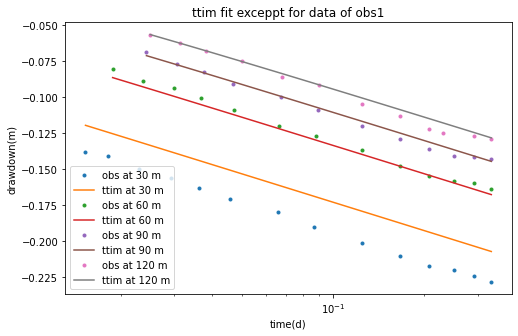

In [6]:
print('rmse:', ca1.rmse())
plt.figure(figsize=(8, 5))
ha1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, '.', label='obs at 30 m')
plt.semilogx(t1, ha1[0], label='ttim at 30 m')
ha2 = ml.head(r2, 0, t2)
plt.semilogx(t2, h2, '.', label='obs at 60 m')
plt.semilogx(t2, ha2[0], label='ttim at 60 m')
ha3 = ml.head(r3, 0, t3)
plt.semilogx(t3, h3, '.', label='obs at 90 m')
plt.semilogx(t3, ha3[0], label='ttim at 90 m')
ha4 = ml.head(r4, 0, t4)
plt.semilogx(t4, h4, '.', label='obs at 120 m')
plt.semilogx(t4, ha4[0], label='ttim at 120 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim fit exceppt for data of obs1')
plt.legend();

In [7]:
ca2 = Calibrate(ml)
ca2.set_parameter(name='kaq0', initial=10, pmin=1, pmax=100)
ca2.set_parameter(name='Saq0', initial=1e-4, pmin=1e-5, pmax=1e-3)
ca2.set_parameter(name='c0', initial=1000, pmin=100, pmax=1e6)
ca2.series(name='obs1', x=r1, y=0, layer=0, t=t1, h=h1)
ca2.series(name='obs3', x=r3, y=0, layer=0, t=t3, h=h3)
ca2.series(name='obs4', x=r4, y=0, layer=0, t=t4, h=h4)
ca2.fit()
display(ca2.parameters)

.....................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 38
    # variables        = 3
    chi-square         = 2.6352e-04
    reduced chi-square = 7.5293e-06
    Akaike info crit   = -445.400159
    Bayesian info crit = -440.487401
[[Variables]]
    kaq0:  45.0264163 +/- 0.52738242 (1.17%) (init = 10)
    Saq0:  4.4092e-05 +/- 1.4055e-06 (3.19%) (init = 0.0001)
    c0:    349.133120 +/- 26.4954569 (7.59%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.714
    C(kaq0, c0)   =  0.711
    C(Saq0, c0)   = -0.155


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,45.0264,0.527382,1.17127,1,100,10,[45.02641630853667]
Saq0,4.40921e-05,0.000001,3.18754,1e-05,0.001,0.0001,[4.409211881296062e-05]
c0,349.133,26.495457,7.58893,100,1e+06,1000,[349.1331197231116]


rmse: 0.0026334097681187055


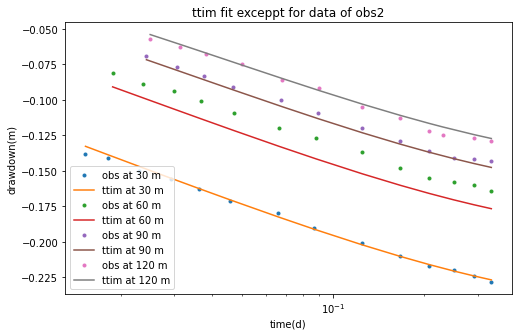

In [8]:
print('rmse:', ca2.rmse())
plt.figure(figsize=(8, 5))
hb1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, '.', label='obs at 30 m')
plt.semilogx(t1, hb1[0], label='ttim at 30 m')
hb2 = ml.head(r2, 0, t2)
plt.semilogx(t2, h2, '.', label='obs at 60 m')
plt.semilogx(t2, hb2[0], label='ttim at 60 m')
hb3 = ml.head(r3, 0, t3)
plt.semilogx(t3, h3, '.', label='obs at 90 m')
plt.semilogx(t3, hb3[0], label='ttim at 90 m')
hb4 = ml.head(r4, 0, t4)
plt.semilogx(t4, h4, '.', label='obs at 120 m')
plt.semilogx(t4, hb4[0], label='ttim at 120 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim fit exceppt for data of obs2')
plt.legend();

In [9]:
ca3 = Calibrate(ml)
ca3.set_parameter(name='kaq0', initial=10, pmin=1, pmax=100)
ca3.set_parameter(name='Saq0', initial=1e-4, pmin=1e-5, pmax=1e-3)
ca3.set_parameter(name='c0', initial=1000, pmin=100, pmax=1e6)
ca3.series(name='obs1', x=r1, y=0, layer=0, t=t1, h=h1)
ca3.series(name='obs3', x=r2, y=0, layer=0, t=t2, h=h2)
ca3.series(name='obs4', x=r4, y=0, layer=0, t=t4, h=h4)
ca3.fit()
display(ca3.parameters)

.....................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 39
    # variables        = 3
    chi-square         = 0.00176424
    reduced chi-square = 4.9007e-05
    Akaike info crit   = -384.140218
    Bayesian info crit = -379.149533
[[Variables]]
    kaq0:  45.2049588 +/- 1.46508149 (3.24%) (init = 10)
    Saq0:  4.7842e-05 +/- 4.1025e-06 (8.57%) (init = 0.0001)
    c0:    318.727713 +/- 67.0042107 (21.02%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.765
    C(kaq0, c0)   =  0.763
    C(Saq0, c0)   = -0.289


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,45.205,1.465081,3.24098,1,100,10,[45.20495883227782]
Saq0,4.78424e-05,0.000004,8.57496,1e-05,0.001,0.0001,[4.784240411045677e-05]
c0,318.728,67.004211,21.0224,100,1e+06,1000,[318.72771295766415]


rmse: 0.0067258453079875775


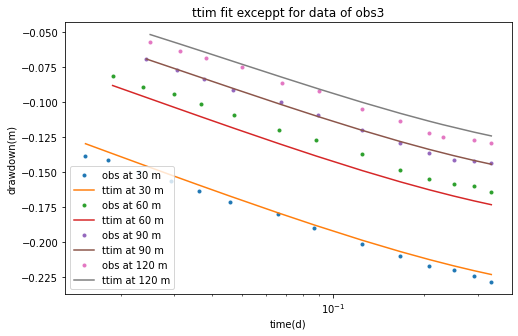

In [10]:
print('rmse:', ca3.rmse())
plt.figure(figsize=(8, 5))
hc1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, '.', label='obs at 30 m')
plt.semilogx(t1, hc1[0], label='ttim at 30 m')
hc2 = ml.head(r2, 0, t2)
plt.semilogx(t2, h2, '.', label='obs at 60 m')
plt.semilogx(t2, hc2[0], label='ttim at 60 m')
hc3 = ml.head(r3, 0, t3)
plt.semilogx(t3, h3, '.', label='obs at 90 m')
plt.semilogx(t3, hc3[0], label='ttim at 90 m')
hc4 = ml.head(r4, 0, t4)
plt.semilogx(t4, h4, '.', label='obs at 120 m')
plt.semilogx(t4, hc4[0], label='ttim at 120 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim fit exceppt for data of obs3')
plt.legend();

In [11]:
ca4 = Calibrate(ml)
ca4.set_parameter(name='kaq0', initial=10, pmin=1, pmax=100)
ca4.set_parameter(name='Saq0', initial=1e-4, pmin=1e-5, pmax=1e-3)
ca4.set_parameter(name='c0', initial=1000, pmin=100, pmax=1e6)
ca4.series(name='obs1', x=r1, y=0, layer=0, t=t1, h=h1)
ca4.series(name='obs3', x=r2, y=0, layer=0, t=t2, h=h2)
ca4.series(name='obs4', x=r3, y=0, layer=0, t=t3, h=h3)
ca4.fit()
display(ca4.parameters)

...............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 39
    # variables        = 3
    chi-square         = 0.00113973
    reduced chi-square = 3.1659e-05
    Akaike info crit   = -401.180633
    Bayesian info crit = -396.189948
[[Variables]]
    kaq0:  41.7208045 +/- 1.22792264 (2.94%) (init = 10)
    Saq0:  5.7838e-05 +/- 3.9836e-06 (6.89%) (init = 0.0001)
    c0:    180.961892 +/- 38.2627543 (21.14%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, c0)   =  0.844
    C(kaq0, Saq0) = -0.794
    C(Saq0, c0)   = -0.452


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,41.7208,1.227923,2.94319,1,100,10,[41.720804507406896]
Saq0,5.78382e-05,0.000004,6.88747,1e-05,0.001,0.0001,[5.7838177631703926e-05]
c0,180.962,38.262754,21.1441,100,1e+06,1000,[180.96189235248528]


rmse: 0.005405898926519027


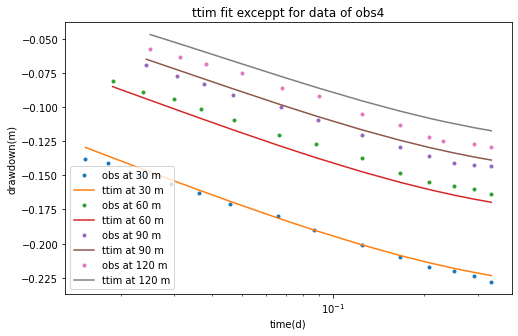

In [12]:
print('rmse:', ca4.rmse())
plt.figure(figsize=(8, 5))
hd1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, '.', label='obs at 30 m')
plt.semilogx(t1, hd1[0], label='ttim at 30 m')
hd2 = ml.head(r2, 0, t2)
plt.semilogx(t2, h2, '.', label='obs at 60 m')
plt.semilogx(t2, hd2[0], label='ttim at 60 m')
hd3 = ml.head(r3, 0, t3)
plt.semilogx(t3, h3, '.', label='obs at 90 m')
plt.semilogx(t3, hd3[0], label='ttim at 90 m')
hd4 = ml.head(r4, 0, t4)
plt.semilogx(t4, h4, '.', label='obs at 120 m')
plt.semilogx(t4, hd4[0], label='ttim at 120 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim fit exceppt for data of obs4')
plt.legend();

Summary of test with three datasets:

In [13]:
t = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]', 'c [d]'], \
                 index=['Data at 30 m removed', 'Data at 60 m removed', \
                       'Data at 90 m removed', 'Data at 120 m removed'])
t.loc['Data at 30 m removed'] = ca1.parameters['optimal'].values
t.loc['Data at 60 m removed'] = ca2.parameters['optimal'].values
t.loc['Data at 90 m removed'] = ca1.parameters['optimal'].values
t.loc['Data at 120 m removed'] = ca4.parameters['optimal'].values
rmse = [ca1.rmse(), ca2.rmse(), ca3.rmse(), ca4.rmse()]
t['RMSE'] = rmse
t

,k [m/d],Ss [1/m],c [d],RMSE
Data at 30 m removed,57.5582,3.2824e-05,998487,0.003230
Data at 60 m removed,45.0264,4.40921e-05,349.133,0.002633
Data at 90 m removed,57.5582,3.2824e-05,998487,0.006726
Data at 120 m removed,41.7208,5.78382e-05,180.962,0.005406


### Calibrate with four datasets simultaneously:

#### Model with pervious top — leakage only:

In [14]:
#unkonwn parameters: kaq, Saq, c
m_1 = ModelMaq(kaq=10, z=[0, zt, zb], c=500, Saq=0.001, topboundary='semi', \
              tmin=0.001, tmax=0.5)
w_1 = Well(m_1, xw=0, yw=0, tsandQ=[(0, Q), (0.34, 0)])
m_1.solve(silent = 'True')

In [15]:
c0 = Calibrate(m_1)
c0.set_parameter(name='kaq0', initial=10)
c0.set_parameter(name='Saq0', initial=1e-4)
c0.set_parameter(name='c0', initial=500, pmin=0)
c0.series(name='obs1', x=30, y=0, t=t1, h=h1, layer=0)
c0.series(name='obs2', x=60, y=0, t=t2, h=h2, layer=0)
c0.series(name='obs3', x=90, y=0, t=t3, h=h3, layer=0)
c0.series(name='obs4', x=120, y=0, t=t4, h=h4, layer=0)
c0.fit(report=True)
display(c0.parameters)

........................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 51
    # variables        = 3
    chi-square         = 0.00178546
    reduced chi-square = 3.7197e-05
    Akaike info crit   = -517.255143
    Bayesian info crit = -511.459666
[[Variables]]
    kaq0:  45.3320015 +/- 1.18524849 (2.61%) (init = 10)
    Saq0:  4.7622e-05 +/- 3.1043e-06 (6.52%) (init = 0.0001)
    c0:    331.170978 +/- 76.1898424 (23.01%) (init = 500)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.771
    C(kaq0, c0)   =  0.762
    C(Saq0, c0)   = -0.299


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,45.332,1.185248,2.6146,-inf,inf,10,[45.332001524257045]
Saq0,4.76224e-05,0.000003,6.51863,-inf,inf,0.0001,[4.762239136215571e-05]
c0,331.171,76.189842,23.0062,0.0,inf,500,[331.170977660899]


rmse: 0.005916842209512141


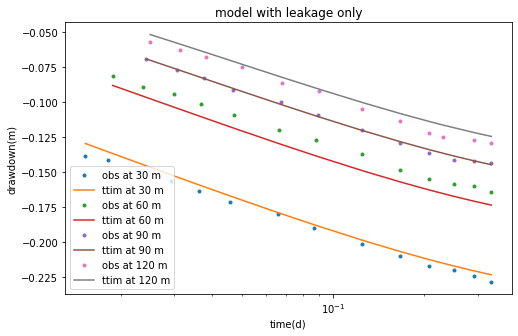

In [16]:
hm_11 = m_1.head(r1, 0, t1)
hm_12 = m_1.head(r2, 0, t2)
hm_13 = m_1.head(r3, 0, t3)
hm_14 = m_1.head(r4, 0, t4)
print('rmse:', c0.rmse())
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, '.', label='obs at 30 m')
plt.semilogx(t1, hm_11[0], label='ttim at 30 m')
plt.semilogx(t2, h2, '.', label='obs at 60 m')
plt.semilogx(t2, hm_12[0], label='ttim at 60 m')
plt.semilogx(t3, h3, '.', label='obs at 90 m')
plt.semilogx(t3, hm_13[0], label='ttim at 90 m')
plt.semilogx(t4, h4, '.', label='obs at 120 m')
plt.semilogx(t4, hm_14[0], label='ttim at 120 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('model with leakage only')
plt.legend();

#### Model with pervious top — leakage & storage:

In [17]:
#unkonwn parameters: kaq, Saq, c, Sll
m_2 = ModelMaq(kaq=10, z=[0, zt, zb], c=500, Saq=0.001, Sll=0.001, \
               topboundary='semi', tmin=0.001, tmax=0.5)
w_2 = Well(m_2, xw=0, yw=0, tsandQ=[(0, Q), (0.34, 0)])
m_2.solve(silent = 'True')

In [18]:
c1 = Calibrate(m_2)
c1.set_parameter(name='kaq0', initial=10)
c1.set_parameter(name='Saq0', initial=1e-4)
c1.set_parameter(name='c0', initial=500, pmin=0)
c1.set_parameter_by_reference(name='Sll', parameter=m_2.aq.Sll[:], initial=1e-5)
c1.series(name='obs1', x=30, y=0, t=t1, h=h1, layer=0)
c1.series(name='obs2', x=60, y=0, t=t2, h=h2, layer=0)
c1.series(name='obs3', x=90, y=0, t=t3, h=h3, layer=0)
c1.series(name='obs4', x=120, y=0, t=t4, h=h4, layer=0)
c1.fit(report=True)
display(c1.parameters)

........................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 149
    # data points      = 51
    # variables        = 4
    chi-square         = 0.00175221
    reduced chi-square = 3.7281e-05
    Akaike info crit   = -516.213733
    Bayesian info crit = -508.486431
[[Variables]]
    kaq0:  45.1608873 +/- 1.19625233 (2.65%) (init = 10)
    Saq0:  4.1015e-05 +/- 5.1016e-06 (12.44%) (init = 0.0001)
    c0:    367.718757 +/- 146.861596 (39.94%) (init = 500)
    Sll:   1.3255e-04 +/- 1.5174e-04 (114.48%) (init = 1e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Saq0, Sll)  = -0.809
    C(c0, Sll)    =  0.699
    C(Saq0, c0)   = -0.594
    C(kaq0, c0)   =  0.382
    C(kaq0, Sll)  = -0.209
    C(kaq0, Saq0) = -0.189


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,45.1609,1.196252,2.64887,-inf,inf,10,[45.160887348164884]
Saq0,4.10148e-05,0.000005,12.4384,-inf,inf,0.0001,[4.10148093882865e-05]
c0,367.719,146.861596,39.9386,0.0,inf,500,[367.71875740092133]
Sll,0.000132546,0.000152,114.479,-inf,inf,1e-05,[0.00013254587256535368]


rmse: 0.005861496548401953


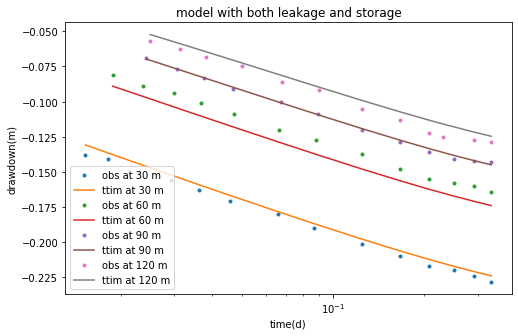

In [19]:
hm_21 = m_2.head(r1, 0, t1)
hm_22 = m_2.head(r2, 0, t2)
hm_23 = m_2.head(r3, 0, t3)
hm_24 = m_2.head(r4, 0, t4)
print('rmse:', c1.rmse())
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, '.', label='obs at 30 m')
plt.semilogx(t1, hm_21[0], label='ttim at 30 m')
plt.semilogx(t2, h2, '.', label='obs at 60 m')
plt.semilogx(t2, hm_22[0], label='ttim at 60 m')
plt.semilogx(t3, h3, '.', label='obs at 90 m')
plt.semilogx(t3, hm_23[0], label='ttim at 90 m')
plt.semilogx(t4, h4, '.', label='obs at 120 m')
plt.semilogx(t4, hm_24[0], label='ttim at 120 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('model with both leakage and storage')
plt.legend();

#### Model with impervious top — storage only:

In [20]:
#unkonwn parameters: kaq1, Saq1, c, Sll
m_3 = ModelMaq(kaq=[0.01, 10], z=[0, -0.001, -8.001, -45.001], c = 500, \
               Saq = [0, 0.001], Sll = 1e-4, topboundary = 'conf', tmin=0.001, tmax=0.5)
w_3 = Well(m_3, xw = 0, yw = 0, tsandQ = [(0, 761), (0.34, 0)], layers = 1)
m_3.solve(silent = 'True')

C:\Users\DELL\Anaconda3\lib\site-packages\ttim\aquifer.py:60: RuntimeWarning: divide by zero encountered in true_divide
  self.D = self.T / self.Scoefaq


In [21]:
c2 = Calibrate(m_3)
c2.set_parameter(name='kaq1', initial=10)
c2.set_parameter(name='Saq1', initial=1e-4)
c2.set_parameter(name='c1', initial=500, pmin=0)
c2.set_parameter_by_reference(name='Sll', parameter=m_3.aq.Sll[:], initial=1e-5, pmin=0)
c2.series(name='obs1', x=30, y=0, t=t1, h=h1, layer=1)
c2.series(name='obs2', x=60, y=0, t=t2, h=h2, layer=1)
c2.series(name='obs3', x=90, y=0, t=t3, h=h3, layer=1)
c2.series(name='obs4', x=120, y=0, t=t4, h=h4, layer=1)
c2.fit(report=True)
display(c2.parameters)

..............................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 91
    # data points      = 51
    # variables        = 4
    chi-square         = 0.00177210
    reduced chi-square = 3.7704e-05
    Akaike info crit   = -515.638239
    Bayesian info crit = -507.910936
[[Variables]]
    kaq1:  45.1865884 +/- 1.21577651 (2.69%) (init = 10)
    Saq1:  3.9424e-05 +/- 5.1577e-06 (13.08%) (init = 0.0001)
    c1:    6670474.95 +/- 2.4647e+10 (369498.49%) (init = 500)
    Sll:   3.12840553 +/- 11683.2831 (373458.08%) (init = 1e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, Sll)   =  1.000
    C(Saq1, Sll) = -0.784
    C(Saq1, c1)  = -0.784
    C(kaq1, Sll) = -0.139
    C(kaq1, c1)  = -0.139


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq1,45.1866,1.215777e+00,2.69057,-inf,inf,10,[45.1865883789621]
Saq1,3.94235e-05,5.157737e-06,13.0829,-inf,inf,0.0001,[3.9423547312967535e-05]
c1,6.67047e+06,2.464730e+10,369498,0.0,inf,500,[6670474.949823412]
Sll,3.12841,1.168328e+04,373458,0.0,inf,1e-05,"[3.1284055340533667, 3.1284055340533667]"


rmse: 0.005894661176988822


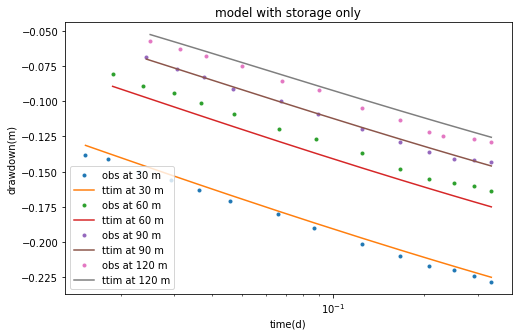

In [22]:
hm_31 = m_3.head(r1, 0, t1)
hm_32 = m_3.head(r2, 0, t2)
hm_33 = m_3.head(r3, 0, t3)
hm_34 = m_3.head(r4, 0, t4)
print('rmse:', c2.rmse())
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, '.', label='obs at 30 m')
plt.semilogx(t1, hm_31[-1], label='ttim at 30 m')
plt.semilogx(t2, h2, '.', label='obs at 60 m')
plt.semilogx(t2, hm_32[-1], label='ttim at 60 m')
plt.semilogx(t3, h3, '.', label='obs at 90 m')
plt.semilogx(t3, hm_33[-1], label='ttim at 90 m')
plt.semilogx(t4, h4, '.', label='obs at 120 m')
plt.semilogx(t4, hm_34[-1], label='ttim at 120 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('model with storage only')
plt.legend();

Since the correlation coefficient between Sll and c is 1.00, which indicates a fully positive correlation, the model is overparameterized. Thus, the uncertainties for parameter Sll and c are unavailabel and are larger for Saq than MLU gives. The calibration is repeated with Sll removed from parameters to be optimized:

In [23]:
#unkonwn parameters: kaq1, Saq1, c, Sll
m_4 = ModelMaq(kaq=[0.01, 10], z=[0, -0.001, -8.001, -45.001], c = 500, \
               Saq = [0, 0.001], Sll = 0.1, topboundary = 'conf', tmin=0.001, tmax=0.5)
w_4 = Well(m_4, xw = 0, yw = 0, tsandQ = [(0, 761), (0.34, 0)], layers = 1)
m_4.solve(silent = 'True')

C:\Users\DELL\Anaconda3\lib\site-packages\ttim\aquifer.py:60: RuntimeWarning: divide by zero encountered in true_divide
  self.D = self.T / self.Scoefaq


In [24]:
c3 = Calibrate(m_4)
c3.set_parameter(name='kaq1', initial=10)
c3.set_parameter(name='Saq1', initial=1e-4)
c3.set_parameter(name='c1', initial=500, pmin=0)
c3.series(name='obs1', x=30, y=0, t=t1, h=h1, layer=1)
c3.series(name='obs2', x=60, y=0, t=t2, h=h2, layer=1)
c3.series(name='obs3', x=90, y=0, t=t3, h=h3, layer=1)
c3.series(name='obs4', x=120, y=0, t=t4, h=h4, layer=1)
c3.fit(report=True)
display(c3.parameters)

.............................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 51
    # variables        = 3
    chi-square         = 0.00177210
    reduced chi-square = 3.6919e-05
    Akaike info crit   = -517.638239
    Bayesian info crit = -511.842762
[[Variables]]
    kaq1:  45.1861189 +/- 1.19134389 (2.64%) (init = 10)
    Saq1:  3.9424e-05 +/- 3.1685e-06 (8.04%) (init = 0.0001)
    c1:    213243.195 +/- 98612.5988 (46.24%) (init = 500)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq1, c1)   =  0.765
    C(Saq1, c1)   =  0.330
    C(kaq1, Saq1) = -0.283


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq1,45.1861,1.191344,2.63653,-inf,inf,10,[45.18611885600881]
Saq1,3.94243e-05,0.000003,8.03701,-inf,inf,0.0001,[3.9424253603649176e-05]
c1,213243,98612.598752,46.2442,0.0,inf,500,[213243.19515519644]


rmse: 0.005894661176430443


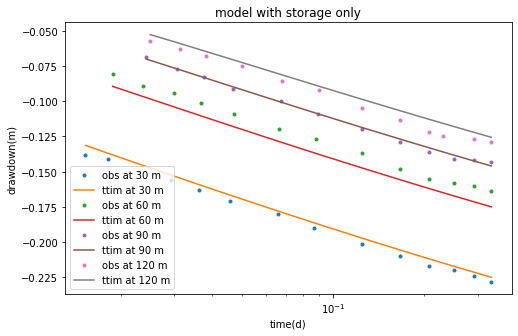

In [25]:
hm_r1 = m_4.head(r1, 0, t1)
hm_r2 = m_4.head(r2, 0, t2)
hm_r3 = m_4.head(r3, 0, t3)
hm_r4 = m_4.head(r4, 0, t4)
print('rmse:', c3.rmse())
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, '.', label='obs at 30 m')
plt.semilogx(t1, hm_r1[-1], label='ttim at 30 m')
plt.semilogx(t2, h2, '.', label='obs at 60 m')
plt.semilogx(t2, hm_r2[-1], label='ttim at 60 m')
plt.semilogx(t3, h3, '.', label='obs at 90 m')
plt.semilogx(t3, hm_r3[-1], label='ttim at 90 m')
plt.semilogx(t4, h4, '.', label='obs at 120 m')
plt.semilogx(t4, hm_r4[-1], label='ttim at 120 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('model with storage only')
plt.legend();

## Summary of values simulated by different models

Since values for parameters presented in Kruseman and de Ridder (1970) are determined by Hantush family of type curves, the results are approximate, not accurate. Values presented in following table are calculated by Hantush well function.

##### Table of methods only considered storage:

In [26]:
t1 = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]', 'c [d]', 'Sll [1/m]'], \
                 index=['Hantush', 'ttim', 'MLU', 'AQTESOLV'])
t1.loc['Hantush'] = [45.332, 4.762E-5, 331.141, '-']
t1.loc['ttim'] = np.append(c3.parameters['optimal'].values, '-')
t1.loc['MLU'] = [45.186, 3.941e-05, 769.200, 3.611e-04]
t1.loc['AQTESOLV'] = [49.286, 4.559e-05, 745.156, '-']
rmse = [0.005917, c3.rmse(), 0.005941, 0.007245]
t1['RMSE'] = rmse
t1

C:\Users\DELL\Anaconda3\lib\site-packages\ttim\aquifer.py:60: RuntimeWarning: divide by zero encountered in true_divide
  self.D = self.T / self.Scoefaq


,k [m/d],Ss [1/m],c [d],Sll [1/m],RMSE
Hantush,45.332,4.762e-05,331.141,-,0.005917
ttim,45.1861,3.94243e-05,213243,-,0.005895
MLU,45.186,3.941e-05,769.2,0.0003611,0.005941
AQTESOLV,49.286,4.559e-05,745.156,-,0.007245


##### Table of methods considered both storage and leakage:

In [27]:
t2 = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]', 'c [d]', 'Sll [1/m]'],\
                 index=['ttim', 'MLU', 'AQTESOLV'])
t2.loc['MLU'] = [45.335, 4.668e-05, 331.400, 1.284e-05]
t2.loc['AQTESOLV'] = [45.159, 4.100e-05, 367.577, 2.868e-05]
t2.loc['ttim'] = c2.parameters['optimal'].values
t2['RMSE'] = [c2.rmse(), 0.004941, 0.005861]
t2

,k [m/d],Ss [1/m],c [d],Sll [1/m],RMSE
ttim,45.1866,3.94235e-05,6.67047e+06,3.12841,0.005895
MLU,45.335,4.668e-05,331.4,1.284e-05,0.004941
AQTESOLV,45.159,4.1e-05,367.577,2.868e-05,0.005861
